In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
files = os.listdir('.')

files=[a for a in files if a.find('.txt')> -1]
files.sort()
eg = [a for a in files if a.find('eg_')> -1]
lu = [a for a in files if a.find('fact_lu_')> -1]

sizes=[100, 1000, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]


In [48]:
def time_avg(f_list):
    avg = []
    for i in f_list:
        temp = []
        with open(i) as f:
            for line in f:
                try:
                    temp.append(float(line))
                except ValueError:
                    pass
        avg.append(sum(temp)/100)
    return avg

In [49]:
eg_times = time_avg(eg)
lu_times = time_avg(lu)
eg_all = []
lu_all = []
for i in range(len(sizes)):
    st = "eg_{} = eg_times[{}]".format(sizes[i], i)
    st_eg_all = "eg_all.append(eg_{})".format(sizes[i])
    st_lu_all = "lu_all.append(lu_{})".format(sizes[i])
    st2 = "lu_{} = lu_times[{}]".format(sizes[i], i)
    exec(st)
    exec(st2)
    exec(st_eg_all)
    exec(st_lu_all)


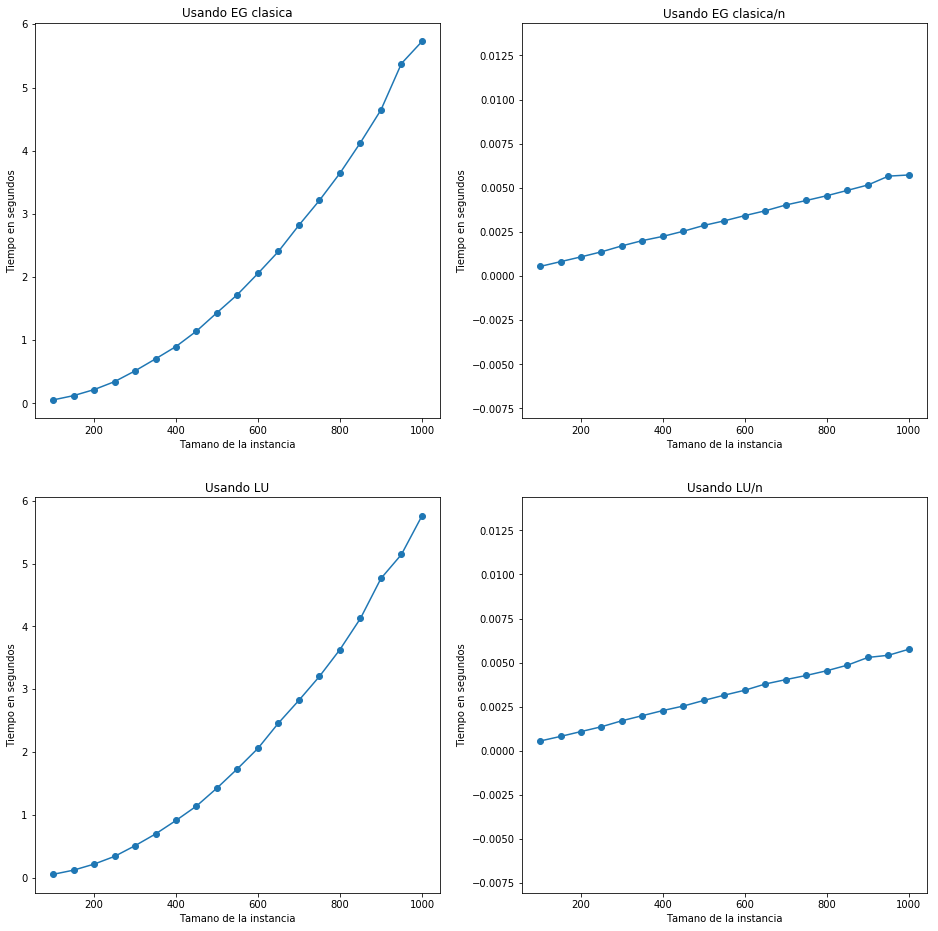

In [55]:
from scipy.interpolate import spline
sizes.sort() # Ordeno tamaños
T = np.array(sizes)
eg_all.sort() # Lo ordeno por tiempos, siempre se cumple que eg_n < eg_n+50
lu_all.sort()
eg_fiteado = []
lu_fiteado = []

for i, size in enumerate(sizes):
    eg_fiteado.append(eg_all[i]/size)
    lu_fiteado.append(lu_all[i]/size)
    
to_plot = [eg_all, eg_fiteado, lu_all, lu_fiteado]

#power = np.array(eg_all)

#power = np.array([eg_100/(100**3), eg_250/(250**3), eg_500/(500**3), eg_750/(750**3), eg_1000/(1000**3)])

xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

power_smooth = spline(T,power,xnew)

fig, ((a1, a2), (a3, a4)) = plt.subplots(2, 2)
subplot = [a1,a2,a3,a4]
fig.set_figwidth(16)
fig.set_figheight(16)
titles = ["Usando EG clasica", "Usando EG clasica/n","Usando LU", "Usando LU/n"]

for i, elem in enumerate(to_plot):
    power = np.array(elem)
    subplot[i].scatter(T, elem)
    subplot[i].plot(T, power) # Version "cruda"
    subplot[i].set_xlabel("Tamano de la instancia")
    subplot[i].set_ylabel("Tiempo en segundos")
    subplot[i].set_title(titles[i])
#plt.plot(xnew,power_smooth) # Version interpolada
#plt.plot(T, power) # Version "cruda"
#plt.xlabel("Tamano de la instancia")
#plt.ylabel("Tiempo en segundos")
plt.show()
